In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def Average(lst): 
    return sum(lst) / len(lst) 

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size. My data set contains 9 columns, 7 of them are talking about the cement block materials and what it is made of and 1 of them says the age of the cement block and the last column is the target column which defines the compressive strength of a concrete block.

In [3]:
df = pd.read_csv('/data/compresive_strength_concrete2.0.csv')

In [28]:
#Here we try to make the values in the dataframe close to 1 since ml works best with these values(Feature scaling.).
df.columns=['cement','blast','flyash','water','superplasticiser','coarse','fine','age','ccs']
col=list(df.columns)
for i in col:
    df[i]=(df[i]-df[i].mean())/df[i].std(ddof=0)
df

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979
5,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,0.702224,0.671475
6,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.472045
7,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.279733,0.037852
8,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
9,1.855641,-0.856888,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.279733,0.207936


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
blast               1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticiser    1030 non-null float64
coarse              1030 non-null float64
fine                1030 non-null float64
age                 1030 non-null float64
ccs                 1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [6]:
df.head()

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [7]:
#defining the data frames for the features and target.
target=df['ccs']
features=df.drop('ccs',axis=1)
target

0       2.645408
1       1.561421
2       0.266627
3       0.313340
4       0.507979
5       0.671475
6       0.472045
7       0.037852
8       0.600806
9       0.207936
10      0.134872
11     -0.467010
12      0.430722
13      0.389998
14      0.718188
15      1.023621
16      0.212128
17      1.217061
18      0.283995
19      0.407366
20      0.360652
21     -0.453835
22     -1.662389
23      0.502589
24      1.000264
25      1.046977
26      0.319329
27      0.976309
28      0.096543
29      0.166613
          ...   
1000    0.526544
1001    1.060153
1002    1.281741
1003    1.802174
1004    1.018830
1005   -0.144809
1006   -1.065299
1007    0.092351
1008   -0.030421
1009    0.408563
1010    0.254050
1011    0.478034
1012    1.522494
1013    0.302560
1014   -0.150199
1015    0.994874
1016   -1.241371
1017    0.158228
1018    0.086961
1019   -0.035212
1020    0.378619
1021   -0.235840
1022    0.342686
1023    0.218117
1024    0.125888
1025    0.506781
1026   -0.277762
1027   -0.7257

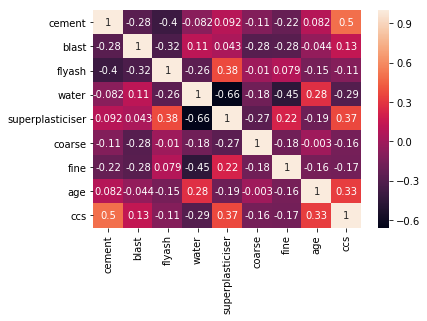

In [8]:
#Compute pairwise correlation of columns, excluding NA/null values, The lighter it is the more correlation between the 2 columns.
sns.heatmap(df.corr(), annot=True)

D:\Anaconda3\envs\ztdl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


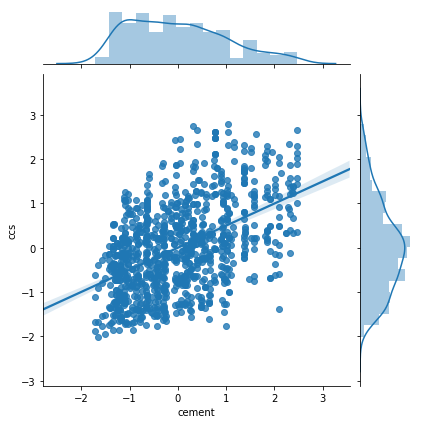

In [9]:
#it allows u to do 2 plotting at the same time, with the parameters 1 being the target column and the other being a feature.
sns.jointplot("cement", "ccs", data=df, kind="reg")

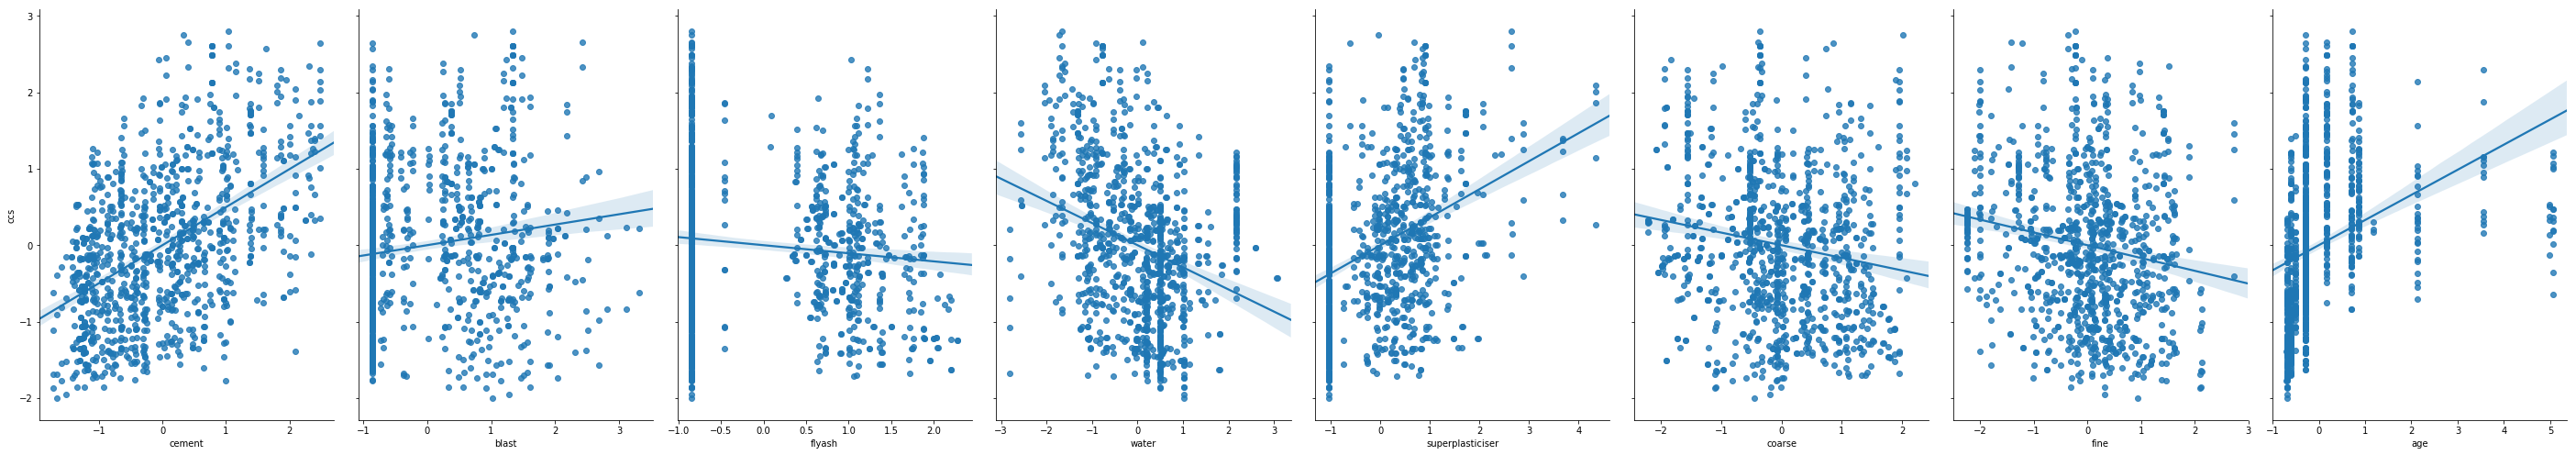

In [10]:
# visualize the relationship between the features and the response using scatterplots.
sns.pairplot(df, x_vars=['cement','blast','flyash','water','superplasticiser','coarse','fine','age'], y_vars='ccs', height=7, aspect=0.7, kind='reg')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

In [13]:
# import model
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression()
# fit the model to the training data (learn the coefficients)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
list(zip(features, lm.coef_))

[('cement', 0.7037260792335271),
 ('blast', 0.49267177953234836),
 ('flyash', 0.310192942599832),
 ('water', -0.20886011575934255),
 ('superplasticiser', 0.10063741955619743),
 ('coarse', 0.0427709534277394),
 ('fine', 0.06071878896041379),
 ('age', 0.4538998371200003)]

In [16]:
# make predictions on the testing set
y_test_pred = lm.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.5167841332697188
Mean Squared Error: 0.44515452622397306
Root Mean Squared Error: 0.6671990154548889


In [19]:
from sklearn.model_selection import KFold

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [21]:
nmse_scores= cross_val_score(lm, features, target, cv=10, scoring='neg_mean_squared_error')
print(nmse_scores)

[-1.11534119 -0.62338553 -0.34345799 -0.62140224 -0.48404083 -0.45656032
 -0.31579819 -0.2937331  -0.24265005 -0.22930777]


In [22]:
mse_scores =-nmse_scores
print(mse_scores)
print("The average of our mse of our 10 folds is:",Average(mse_scores))

[1.11534119 0.62338553 0.34345799 0.62140224 0.48404083 0.45656032
 0.31579819 0.2937331  0.24265005 0.22930777]
The average of our mse of our 10 folds is: 0.47256772054120927


In [23]:
nmae_scores=cross_val_score(lm, features, target, cv=10, scoring='neg_mean_absolute_error')
print(nmae_scores)

[-0.89472285 -0.63941014 -0.48199646 -0.6531033  -0.5617157  -0.53990224
 -0.47599695 -0.39540834 -0.38420044 -0.38086689]


In [24]:
mae_scores = -nmae_scores
print(mae_scores)
print("The average of our mae of our 10 folds is:",Average(mae_scores))

[0.89472285 0.63941014 0.48199646 0.6531033  0.5617157  0.53990224
 0.47599695 0.39540834 0.38420044 0.38086689]
The average of our mae of our 10 folds is: 0.5407323306338406


In [25]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print("The average of our rmse of our 10 folds is:",Average(rmse_scores))

[1.05609715 0.78954768 0.58605289 0.78829071 0.69573043 0.67569248
 0.56195924 0.54197149 0.49259522 0.47886091]
The average of our rmse of our 10 folds is: 0.6666798184037915


In [26]:
list(zip(features, lm.coef_))

[('cement', 0.7037260792335271),
 ('blast', 0.49267177953234836),
 ('flyash', 0.310192942599832),
 ('water', -0.20886011575934255),
 ('superplasticiser', 0.10063741955619743),
 ('coarse', 0.0427709534277394),
 ('fine', 0.06071878896041379),
 ('age', 0.4538998371200003)]

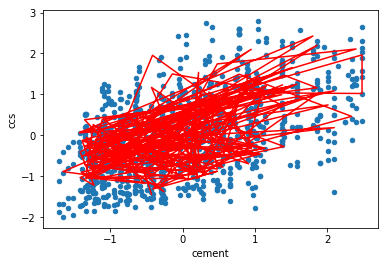

In [27]:
df.plot(kind='scatter',
        x='cement',
        y='ccs')
plt.plot(X_test["cement"], y_test_pred, color='red')

# We notice from our data set that the most feature that is directly propotional to our target is the "Cement" and the feature with the most inversily propotional to our target is "Water".